# Welcome to Fast.AI v3!
## Originally taught by Jeremy Howard

## Moderated by Zachary Mueller and John Chamblee

# 2nd Edition

### Monday's 5-6:30pm, Friday's 4-5:30
### Building 4, Room 247





###Minimum Requirements: 


*   A want to learn
*   Some basic coding skills (or ability to learn quickly)
*   High School math


###From the words of Jeremy:
###*"The world needs everyone to be involved with AI, no matter how unlikely your background."*


# What is fastai?

The fastai library is a state-of-the-art deep neural network library aided to help prepare models on a standard pipeline for deployment or research in a way that is simple enough for most people to understand and use with ease. 

# What is this course?

## Split into two sessions/sections

## Mondays:
  * General overview/introduction of techniques
  * Good starting place
  * Mostly taught by John
  
## Fridays:
  * Advanced topics and labs
  * Look at how to apply these techniques into your research
  * How to use the current state of the art (more than the Monday's will teach you)
  * Taught by Zach
  
# HIGHLY ENCOURAGE YOU COME TO BOTH

# Overall Schedule:

|  | Monday | Friday |
|:------:|:-------------------------------------------:|:--------------------------------------------------------------------------:|
| **Week 1** | Introduction | Introduction |
| **Week 2** | Custom computer vision tasks | State of the art in Computer Vision |
| **Week 3** | Introduction to Tabular modeling and pandas | Pandas workshop and feature engineering |
| **Week 4** | Tabular and Image Regression | Feature importance and advanced feature  engineering |
| **Week 5** | Natural Language Processing | State of the art in NLP |
| **Week 6** | Segmentation | Kaggle Introducion with Segmentation |
| **Week 7** | Computer vision from scratch | NLP from scratch |
| **Week 8** | Callbacks | Optimizers |
| **Week 9** | Generative Adversarial Networks | Research time / presentations |
| **Week 10** | Putting models into production | Putting models into production |

# What we will be doing today:
 * Setting up the Colab environment
 * Getting the Fast.AI libraries
 * Creating our model
 * Using a basic dataset to make a classifier

# Why Google Colaboratory?


*   Free access to GPU's
*   Hardest part is setting it up

## Setting up Google Colab

1. Go to 'Google Drive'
2. Select 'New'
3. Select 'More'
4. Select 'Colaboratory'


![alt text](https://i.imgur.com/n4mQ2qj.png)

## Changing our processer to a GPU

* 'Runtime'
* 'Change runtime type'
* 'Runtime type' should be 'Python 3'
* 'Hardware accelerator' should be 'GPU' 

## Initial Run Warning

***If you get a pop up saying 'Warning: This notebook was not authored by Google,' check 'Reset all runtimes before running' and click 'Run Anyway'***

![alt text](https://course-v3.fast.ai/images/colab/02.png)

## Saving your work

![alt text](https://course-v3.fast.ai/images/colab/09.png)

# New code

Here I will be posting any new code we will be using and their documentation links, as well as the link to find the source code

`untar_data`:  [docs](https://docs.fast.ai/datasets.html#untar_data) [source](https://github.com/fastai/fastai/blob/master/fastai/datasets.py#L221)

`get_image_files`: [docs](https://docs.fast.ai/vision.data.html#get_image_files) [source](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L19)

`ImageDataBunch`: [docs](https://docs.fast.ai/vision.data.html#ImageDataBunch) [source](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L85)

`cnn_learner`: [docs](https://docs.fast.ai/vision.learner.html#cnn_learner) [source]()

`fit_one_cycle`: [docs]() [source](https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L91)

`ClassificationInterpretation`: [docs](https://docs.fast.ai/train.html#ClassificationInterpretation) [source](https://github.com/fastai/fastai/blob/master/fastai/train.py#L163)

# Now for the Fun Part

First, import the fastai libraries

In [0]:
from fastai import *
from fastai.vision import *

**fastai supports 4 datatypes:**
* Computer vision (fastai.vision)
* Natural language text (fastai.text)
* Tabular Data (fastai.tabular)
* Collaborative filtering (fastai.collab) * not taught

## Looking at Data

We will use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al, 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which has images of 12 cat and 25 dog breeds. The model we will build must be able to differentiate between the 37 different species. In the paper, their best accuracy in 2012 was 59.21% using a specific detection method that had a "Image", "Head", and "Body" model for the photos. **WE** will be trying to classify them via only a full image of the species.

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [0]:
untar_data??

This will download our dataset

In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

Let's see what we downloaded

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_img = path/'images'

First thing we need to check for is *HOW* the data was stored. For our problem, our class names are saved within the filenames of the pictures. We will pull the names from our files to get our classes and allow us to classify them correctly. ImageDataBunch.from_name_re will get our labels from the filenames via a regular expression

In [0]:
fnames = get_image_files(path_img)
fnames

Next we will use a random seed to introduce a nonbias into the start of our project, folowed by create our ImageDataBunch, a bunch of data we will be testing

In [0]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

Here we use regex to extract the class from the filename. If you wish to learn more about regex,  look up Regular Expressions

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data = data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category Maine_Coon, Category german_shorthaired, Category Abyssinian, Category staffordshire_bull_terrier, Category pomeranian]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 500, 420), Image (3, 333, 500), Image (3, 442, 500), Image (3, 333, 500), Image (3, 375, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category wheaten_terrier, Category pug, Category american_bulldog, Category Bombay, Category english_cocker_spaniel]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 375, 500), Image (3, 500, 342), Image (3, 333, 500), Image (3, 864, 1152), Image (3, 375, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

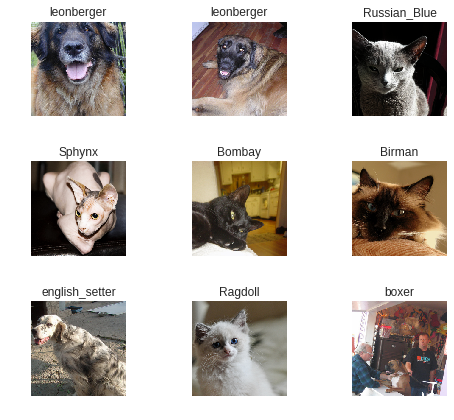

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Time to train the model!

We will be using a convolutional nerual network backbone and a fully connected head with a single hidden layer as our classifier. Don't worry if thats a bunch of nonesence for now. Right now, just know this: we are piggybacking off of a model to help us classify images into 37 categories

First, we need to make our Neural Network

In [0]:
learn = cnn_learner(data, models.resnet34, pretrained=True, metrics=error_rate)
# data we defined above
# to get your model you want, use models. eg models.resnet50, etc
# metrics is how will we define doing 'good'

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 63591962.66it/s]


Now, we can train it! We will train it for four cycles through all our data

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.392361,0.341567,0.106225
2,0.552817,0.268450,0.087957
3,0.347472,0.251278,0.083221
4,0.256707,0.230781,0.077808


In [0]:
learn.save('stage_1')

## Lets look at our results

First we will look at where our model messed up. What species did it have trouble differentiating between? So long as the misidentifications are not too crazy, our model is actually working

Then we will plot our confusion matrix, see what specific species it cannot seem to differentiate between

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

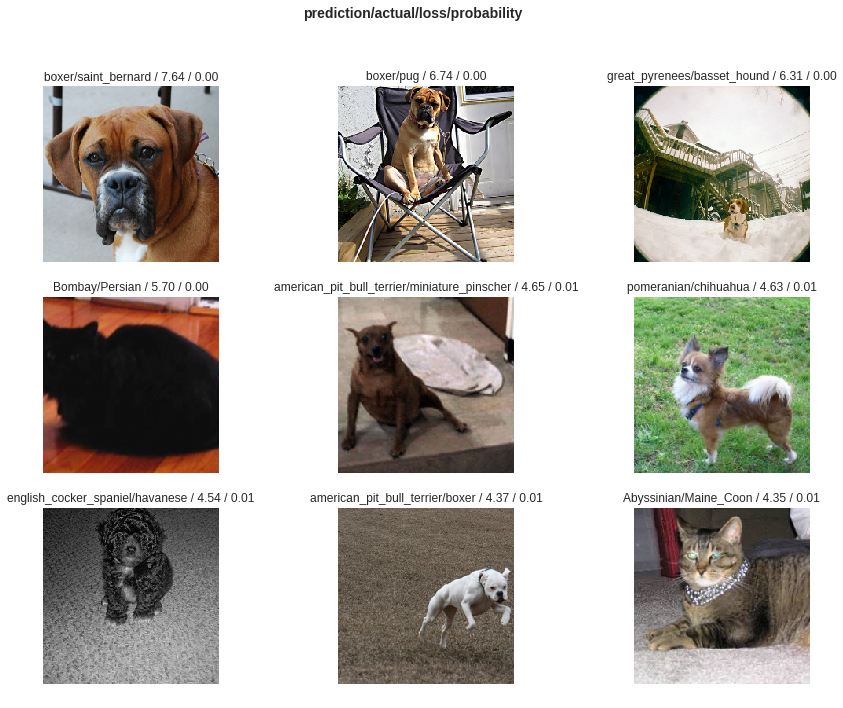

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

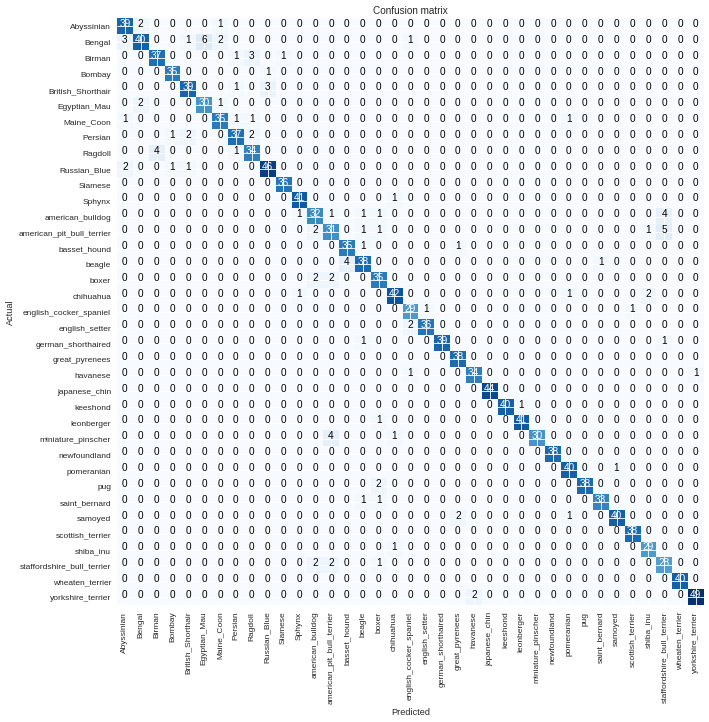

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('beagle', 'basset_hound', 4),
 ('miniature_pinscher', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Birman', 'Ragdoll', 3),
 ('British_Shorthair', 'Russian_Blue', 3)]

## Unfreezing our data, fine-tuning, and our learning rates

So. We have the model. Lets fine tune it. First we need to load our model in 

In [0]:
learn.load('stage_1')

Ok. We have our model. Now we will *unfreeze* and train more

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.419299,0.725039,0.209066
2,0.565970,0.567814,0.162382
3,0.350442,0.307610,0.100135
4,0.164682,0.223899,0.073072


Now that we've trained more, let's look at how our learning rates are going throughout the layers

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


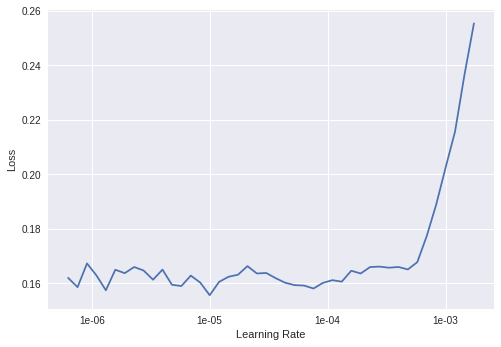

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
#lets try again with all our layers!
learn.fit_one_cycle(2, max_lr=slice(3e-05, 3e-04))

epoch,train_loss,valid_loss,error_rate
1,0.249604,0.279367,0.091340
2,0.173162,0.219084,0.069012


In [0]:
learn.save('stage_2')

Add visual of the layers

## Now lets try with a resnet50!

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,0.684013,0.236242,0.071719
2,0.300023,0.174182,0.052097


Alright so right off the bat we have 1% more accuracy. Fantastic! Let's do our learning rate finder again and see if we can do any better!

In [0]:
learn.save('resnet50')

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


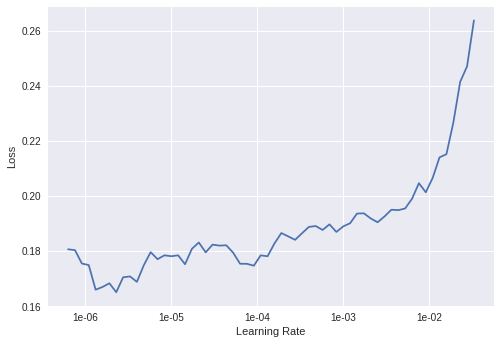

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.load('resnet50')
learn.fit_one_cycle(3, max_lr=slice(3e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.205414,0.117805,0.039919
2,0.193487,0.111725,0.035859
3,0.172549,0.113557,0.039242


In [0]:
learn.save('resnet50')

4% is better! Not perfect, but we're not going for a perfect model. We just want a proof of concept!

# The fastai forums

* Arguably a better resource than the actual class
* Have a question? Ask here! Even if it seems dumb
* forums.fast.ai

* My handle is muellerzr

# Now YOU try!
## Main takeaways:


*   How to create an ImageDataBunch
*   Creating your learner
*   Finding the right learning rate to improve your accuracy

## If you want to learn more about certain commands or read more:

### https://docs.fast.ai
### https://forums.fast.ai

## Jeremy's Lesson 1 Video:

### https://tinyurl.com/fastaiLesson1

## Our emails:
### zrm3@students.uwf.edu - Zach
### jtc38@students.uwf.edu - John

### Images used were from Jeremy Howard's lesson 1 slides